# Sample Code for Fetching GitHub API Data
## The code in this notebook and repository is a companion for the tutorial entitled:
## The Challenges and Opportunities Mining GitHub

The notebook is split into sections that show how different data collection tasks can be performed.

Do not forget to look into utils.py as well.

In [120]:
# fetch the function we will use from utils.py
from utils import fetch_github_api_data, search_github
import pandas as pd
from pandas.io.json import json_normalize

# Fetching Repositories for a User

Path: `/users/:username/repos`

Eee https://developer.github.com/v3/repos/#list-user-repositories


In [2]:
# fetch repos for use andrew
df = fetch_github_api_data("/users/andrew/repos")

In [3]:
# let's view some of the repos
df.head().T

,0,1,2,3,4
archive_url,https://api.github.com/repos/andrew/3D-contrib...,https://api.github.com/repos/andrew/a2-in-memo...,https://api.github.com/repos/andrew/alan-utils...,https://api.github.com/repos/andrew/alaveteli/...,https://api.github.com/repos/andrew/andi-utils...
archived,False,False,False,False,False
assignees_url,https://api.github.com/repos/andrew/3D-contrib...,https://api.github.com/repos/andrew/a2-in-memo...,https://api.github.com/repos/andrew/alan-utils...,https://api.github.com/repos/andrew/alaveteli/...,https://api.github.com/repos/andrew/andi-utils...
blobs_url,https://api.github.com/repos/andrew/3D-contrib...,https://api.github.com/repos/andrew/a2-in-memo...,https://api.github.com/repos/andrew/alan-utils...,https://api.github.com/repos/andrew/alaveteli/...,https://api.github.com/repos/andrew/andi-utils...
branches_url,https://api.github.com/repos/andrew/3D-contrib...,https://api.github.com/repos/andrew/a2-in-memo...,https://api.github.com/repos/andrew/alan-utils...,https://api.github.com/repos/andrew/alaveteli/...,https://api.github.com/repos/andrew/andi-utils...
clone_url,https://github.com/andrew/3D-contributions.git,https://github.com/andrew/a2-in-memory-web-api...,https://github.com/andrew/alan-utils.git,https://github.com/andrew/alaveteli.git,https://github.com/andrew/andi-utils.git
collaborators_url,https://api.github.com/repos/andrew/3D-contrib...,https://api.github.com/repos/andrew/a2-in-memo...,https://api.github.com/repos/andrew/alan-utils...,https://api.github.com/repos/andrew/alaveteli/...,https://api.github.com/repos/andrew/andi-utils...
comments_url,https://api.github.com/repos/andrew/3D-contrib...,https://api.github.com/repos/andrew/a2-in-memo...,https://api.github.com/repos/andrew/alan-utils...,https://api.github.com/repos/andrew/alaveteli/...,https://api.github.com/repos/andrew/andi-utils...
commits_url,https://api.github.com/repos/andrew/3D-contrib...,https://api.github.com/repos/andrew/a2-in-memo...,https://api.github.com/repos/andrew/alan-utils...,https://api.github.com/repos/andrew/alaveteli/...,https://api.github.com/repos/andrew/andi-utils...
compare_url,https://api.github.com/repos/andrew/3D-contrib...,https://api.github.com/repos/andrew/a2-in-memo...,https://api.github.com/repos/andrew/alan-utils...,https://api.github.com/repos/andrew/alaveteli/...,https://api.github.com/repos/andrew/andi-utils...


In [4]:
# the full names of all the repos
df.full_name

0          andrew/3D-contributions
1      andrew/a2-in-memory-web-api
2                andrew/alan-utils
3                 andrew/alaveteli
4                andrew/andi-utils
5            andrew/andrew-nesbitt
6        andrew/andrew-nesbitt.com
7                  andrew/anyproxy
8     andrew/api.spreecommerce.com
9            andrew/appsignal-docs
10              andrew/apt-on-ipfs
11          andrew/ar-drone-dancer
12             andrew/ar-drone-gps
13        andrew/ar-drone-keyboard
14            andrew/ar-drone-rest
15        andrew/ardrone-webflight
16      andrew/arduino-experiments
17                    andrew/artoo
18                andrew/base62.go
19            andrew/bathruby-2015
20                andrew/ben-utils
21                andrew/bitbucket
22           andrew/bootstrap-sass
23                  andrew/bouncer
24                     andrew/brew
25                  andrew/brewery
26             andrew/brightonruby
27      andrew/broc-and-hape-utils
28                  

In [5]:
# the data available
df.columns

Index(['archive_url', 'archived', 'assignees_url', 'blobs_url', 'branches_url',
       'clone_url', 'collaborators_url', 'comments_url', 'commits_url',
       'compare_url', 'contents_url', 'contributors_url', 'created_at',
       'default_branch', 'deployments_url', 'description', 'downloads_url',
       'events_url', 'fork', 'forks', 'forks_count', 'forks_url', 'full_name',
       'git_commits_url', 'git_refs_url', 'git_tags_url', 'git_url',
       'has_downloads', 'has_issues', 'has_pages', 'has_projects', 'has_wiki',
       'homepage', 'hooks_url', 'html_url', 'id', 'issue_comment_url',
       'issue_events_url', 'issues_url', 'keys_url', 'labels_url', 'language',
       'languages_url', 'license', 'license.key', 'license.name',
       'license.node_id', 'license.spdx_id', 'license.url', 'merges_url',
       'milestones_url', 'mirror_url', 'name', 'node_id', 'notifications_url',
       'open_issues', 'open_issues_count', 'owner.avatar_url',
       'owner.events_url', 'owner.followe

In [6]:
# let's select some useful information
df[["full_name","forks","owner.login","owner.type","watchers_count","size","language","license.key"]]

,full_name,forks,owner.login,owner.type,watchers_count,size,language,license.key
0,andrew/3D-contributions,2,andrew,User,1,152,JavaScript,mit
1,andrew/a2-in-memory-web-api,0,andrew,User,0,70,JavaScript,mit
2,andrew/alan-utils,0,andrew,User,0,21,JavaScript,agpl-3.0
3,andrew/alaveteli,0,andrew,User,0,91826,Ruby,other
4,andrew/andi-utils,0,andrew,User,0,21,JavaScript,agpl-3.0
5,andrew/andrew-nesbitt,0,andrew,User,1,392,JavaScript,NaN
6,andrew/andrew-nesbitt.com,0,andrew,User,1,884,CoffeeScript,mit
7,andrew/anyproxy,0,andrew,User,0,4062,JavaScript,apache-2.0
8,andrew/api.spreecommerce.com,0,andrew,User,0,2444,JavaScript,NaN
9,andrew/appsignal-docs,0,andrew,User,0,2833,Ruby,mit


# Using the Search API

Path:  `/search/repositories`

Required Param: q

See: https://developer.github.com/v3/search/#search-repositories

See utils.search_github on how accessing search API is implemented

search_github params are:
- resource: The name of the resource, can be repositories, users, topics, commits, code ... etc (see [searching on github](https://help.github.com/en/articles/searching-on-github))
- search_query: see [constructing search queries](https://developer.github.com/v3/search/#constructing-a-search-query)
- page **(optional)**: The page number of the result. If the page is not included, the result will include **pagination** information that you can use to know the result has how many pages.

**Response limit**: Even with pagination, search api is limited to 1000 results.

**Note about forks**: Forks are not included in search by default, please see https://help.github.com/en/articles/searching-in-forks

In [75]:
# searching for python repositories that contain the term web framework
search_query = "web+framework+language:python"
res = search_github("repositories", search_query)

Fetching data from https://api.github.com/search/repositories


In [63]:
# what does the response include?
res.keys()

dict_keys(['total_count', 'incomplete_results', 'items', 'pagination'])

In [64]:
# number of repositories that match search query
res.get("total_count")

3391

In [66]:
# False means that GitHub was able to complete the search query
# If it True, it means the query was killed to conserve API resources
res.get("incomplete_results")

False

In [71]:
# data is in items, can be normalized to create dataframe
res_df = json_normalize(res.get("items"))
res_df.head().T

,0,1,2,3,4
archive_url,https://api.github.com/repos/django/django/{ar...,https://api.github.com/repos/pallets/flask/{ar...,https://api.github.com/repos/Pylons/pyramid/{a...,https://api.github.com/repos/lorien/grab/{arch...,https://api.github.com/repos/cobrateam/splinte...
archived,False,False,False,False,False
assignees_url,https://api.github.com/repos/django/django/ass...,https://api.github.com/repos/pallets/flask/ass...,https://api.github.com/repos/Pylons/pyramid/as...,https://api.github.com/repos/lorien/grab/assig...,https://api.github.com/repos/cobrateam/splinte...
blobs_url,https://api.github.com/repos/django/django/git...,https://api.github.com/repos/pallets/flask/git...,https://api.github.com/repos/Pylons/pyramid/gi...,https://api.github.com/repos/lorien/grab/git/b...,https://api.github.com/repos/cobrateam/splinte...
branches_url,https://api.github.com/repos/django/django/bra...,https://api.github.com/repos/pallets/flask/bra...,https://api.github.com/repos/Pylons/pyramid/br...,https://api.github.com/repos/lorien/grab/branc...,https://api.github.com/repos/cobrateam/splinte...
clone_url,https://github.com/django/django.git,https://github.com/pallets/flask.git,https://github.com/Pylons/pyramid.git,https://github.com/lorien/grab.git,https://github.com/cobrateam/splinter.git
collaborators_url,https://api.github.com/repos/django/django/col...,https://api.github.com/repos/pallets/flask/col...,https://api.github.com/repos/Pylons/pyramid/co...,https://api.github.com/repos/lorien/grab/colla...,https://api.github.com/repos/cobrateam/splinte...
comments_url,https://api.github.com/repos/django/django/com...,https://api.github.com/repos/pallets/flask/com...,https://api.github.com/repos/Pylons/pyramid/co...,https://api.github.com/repos/lorien/grab/comme...,https://api.github.com/repos/cobrateam/splinte...
commits_url,https://api.github.com/repos/django/django/com...,https://api.github.com/repos/pallets/flask/com...,https://api.github.com/repos/Pylons/pyramid/co...,https://api.github.com/repos/lorien/grab/commi...,https://api.github.com/repos/cobrateam/splinte...
compare_url,https://api.github.com/repos/django/django/com...,https://api.github.com/repos/pallets/flask/com...,https://api.github.com/repos/Pylons/pyramid/co...,https://api.github.com/repos/lorien/grab/compa...,https://api.github.com/repos/cobrateam/splinte...


In [72]:
# What are the names of the repos in the result?
res_df.full_name

0                           django/django
1                           pallets/flask
2                          Pylons/pyramid
3                             lorien/grab
4                      cobrateam/splinter
5                           scrapy/scrapy
6                             webpy/webpy
7                        vibora-io/vibora
8          robotframework/SeleniumLibrary
9                      tornadoweb/tornado
10                        mozilla/OpenWPM
11                     andresriancho/w3af
12                          gaojiuli/gain
13     GetBlimp/django-rest-framework-jwt
14                        falconry/falcon
15                       adamhajari/spyre
16                             orf/cyborg
17    jtauber-archive/django-notification
18                        bottlepy/bottle
19                kevthehermit/VolUtility
20                          gi0baro/weppy
21                    pinax/django-mailer
22                         limodou/uliweb
23                    0xbing/wukon

In [76]:
# result also included pagination information
# The current result is first page
# there is a total of 10 pages
res.get("pagination")

{'page': 1, 'total_pages': 10}

In [77]:
# let's fetch the 5th page
# url and resource must be identical to 1st page
res5 = search_github("repositories", "web+framework+language:python", page=5)

Fetching data from https://api.github.com/search/repositories


In [78]:
# notice how pagination is not included
# it is included only with first page
# everything else is the same
res5.keys()

dict_keys(['total_count', 'incomplete_results', 'items'])

In [79]:
# names of repos in 5th page, notice they are different

df_res5 = json_normalize(res5.get("items"))
df_res5.full_name

0                          yoongkang/nardis
1                          malthe/ugandasms
2                        amirouche/beyondjs
3                                rsms/smisk
4                      schlamar/droidbottle
5                              boto/botoweb
6                               mofr/winter
7                             lunant/apollo
8                   gigapixel/project-cylon
9                           pytsite/pytsite
10                        dittos/DEAD__vers
11     smileboywtu/tornado-restful-template
12                             osantana/toy
13               diku-dk/futhark-with-fangs
14                               blaix/woma
15                                dsc/trowl
16                   phoracek/webpy-modules
17                       hmleal/quicksilver
18                            nicodds/chesf
19                         imapex/aic_webui
20                    endormi/python-webapp
21                            simyy/Simfish
22                     gabrielfa

In [82]:
# will use this to sleep between responses
import time

# how to fetch all data for a paginated response:
search_query = "web+framework+language:python"
resource = "repositories"
res = search_github(resource, search_query)
dataframes = [json_normalize(res.get("items")),] # list of dataframes
# if pagination exists, then we have mroe pages
if res.get("pagination"):
    pages = range(2,res.get("pagination").get("total_pages")+1)
    for p in pages:
        # only page is added
        res = search_github(resource, search_query, page=p)
        # parse items as a response and append to list of dataframes
        dataframes.append(json_normalize(res.get("items")))
        # sleep for a few seconds (modify as needed)
        print("sleeping for 5 seconds ...")
        time.sleep(5)

# concatinate the dataframes
search_df = pd.concat(dataframes, ignore_index=True)

Fetching data from https://api.github.com/search/repositories
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...
Fetching data from https://api.github.com/search/repositories
sleeping for 5 seconds ...


In [100]:
# notice we have 1000 items now
# this is the limit GitHub places on each search response
search_df

,archive_url,archived,assignees_url,blobs_url,branches_url,clone_url,collaborators_url,comments_url,commits_url,compare_url,...,subscription_url,svn_url,tags_url,teams_url,topics,trees_url,updated_at,url,watchers,watchers_count
0,https://api.github.com/repos/django/django/{ar...,False,https://api.github.com/repos/django/django/ass...,https://api.github.com/repos/django/django/git...,https://api.github.com/repos/django/django/bra...,https://github.com/django/django.git,https://api.github.com/repos/django/django/col...,https://api.github.com/repos/django/django/com...,https://api.github.com/repos/django/django/com...,https://api.github.com/repos/django/django/com...,...,https://api.github.com/repos/django/django/sub...,https://github.com/django/django,https://api.github.com/repos/django/django/tags,https://api.github.com/repos/django/django/teams,"[apps, django, framework, models, orm, python,...",https://api.github.com/repos/django/django/git...,2019-03-23T07:41:59Z,https://api.github.com/repos/django/django,40275,40275
1,https://api.github.com/repos/pallets/flask/{ar...,False,https://api.github.com/repos/pallets/flask/ass...,https://api.github.com/repos/pallets/flask/git...,https://api.github.com/repos/pallets/flask/bra...,https://github.com/pallets/flask.git,https://api.github.com/repos/pallets/flask/col...,https://api.github.com/repos/pallets/flask/com...,https://api.github.com/repos/pallets/flask/com...,https://api.github.com/repos/pallets/flask/com...,...,https://api.github.com/repos/pallets/flask/sub...,https://github.com/pallets/flask,https://api.github.com/repos/pallets/flask/tags,https://api.github.com/repos/pallets/flask/teams,"[flask, jinja, python, web-framework, werkzeug...",https://api.github.com/repos/pallets/flask/git...,2019-03-23T07:42:38Z,https://api.github.com/repos/pallets/flask,42780,42780
2,https://api.github.com/repos/Pylons/pyramid/{a...,False,https://api.github.com/repos/Pylons/pyramid/as...,https://api.github.com/repos/Pylons/pyramid/gi...,https://api.github.com/repos/Pylons/pyramid/br...,https://github.com/Pylons/pyramid.git,https://api.github.com/repos/Pylons/pyramid/co...,https://api.github.com/repos/Pylons/pyramid/co...,https://api.github.com/repos/Pylons/pyramid/co...,https://api.github.com/repos/Pylons/pyramid/co...,...,https://api.github.com/repos/Pylons/pyramid/su...,https://github.com/Pylons/pyramid,https://api.github.com/repos/Pylons/pyramid/tags,https://api.github.com/repos/Pylons/pyramid/teams,"[pylons, pyramid, python, web-framework, wsgi]",https://api.github.com/repos/Pylons/pyramid/gi...,2019-03-22T14:10:17Z,https://api.github.com/repos/Pylons/pyramid,3079,3079
3,https://api.github.com/repos/lorien/grab/{arch...,False,https://api.github.com/repos/lorien/grab/assig...,https://api.github.com/repos/lorien/grab/git/b...,https://api.github.com/repos/lorien/grab/branc...,https://github.com/lorien/grab.git,https://api.github.com/repos/lorien/grab/colla...,https://api.github.com/repos/lorien/grab/comme...,https://api.github.com/repos/lorien/grab/commi...,https://api.github.com/repos/lorien/grab/compa...,...,https://api.github.com/repos/lorien/grab/subsc...,https://github.com/lorien/grab,https://api.github.com/repos/lorien/grab/tags,https://api.github.com/repos/lorien/grab/teams,"[asynchronous, framework, http-client, network...",https://api.github.com/repos/lorien/grab/git/t...,2019-03-23T07:34:31Z,https://api.github.com/repos/lorien/grab,1708,1708
4,https://api.github.com/repos/cobrateam/splinte...,False,https://api.github.com/repos/cobrateam/splinte...,https://api.github.com/repos/cobrateam/splinte...,https://api.github.com/repos/cobrateam/splinte...,https://github.com/cobrateam/splinter.git,https://api.github.com/repos/cobrateam/splinte...,https://api.github.com/repos/cobrateam/splinte...,https://api.github.com/repos/cobrateam/splinte...,https://api.github.com/repos/cobrateam/splinte...,...,https://api.github.com/repos/cobrateam/splinte...,https://github.com/cobrateam/splinter,https://api.gi

# Randomly Sampling Results
One use case for search is to collect repositories or resources that match a certain criteria then randomly sample from these projects or resources for analysis.

While we only collected 1000 repositories for our search criteria, it is possible to combine many results into one large dataset.

Also note, this data doesn't have to be the final data used in the analysis. It can be only the repositories chosen as a sample for further data collection. Therefore, the basic idea is to randomly select repository names that we can then collect more data on and analyze.

In [97]:
# randomly sample 100 projects
import random
my_sample = random.sample(list(search_df.full_name), 100)
# number of items in my_sample
len(my_sample)

100

In [101]:
# get data we have for this sample
search_df[search_df.full_name.isin(my_sample)]

,archive_url,archived,assignees_url,blobs_url,branches_url,clone_url,collaborators_url,comments_url,commits_url,compare_url,...,subscription_url,svn_url,tags_url,teams_url,topics,trees_url,updated_at,url,watchers,watchers_count
3,https://api.github.com/repos/lorien/grab/{arch...,False,https://api.github.com/repos/lorien/grab/assig...,https://api.github.com/repos/lorien/grab/git/b...,https://api.github.com/repos/lorien/grab/branc...,https://github.com/lorien/grab.git,https://api.github.com/repos/lorien/grab/colla...,https://api.github.com/repos/lorien/grab/comme...,https://api.github.com/repos/lorien/grab/commi...,https://api.github.com/repos/lorien/grab/compa...,...,https://api.github.com/repos/lorien/grab/subsc...,https://github.com/lorien/grab,https://api.github.com/repos/lorien/grab/tags,https://api.github.com/repos/lorien/grab/teams,"[asynchronous, framework, http-client, network...",https://api.github.com/repos/lorien/grab/git/t...,2019-03-23T07:34:31Z,https://api.github.com/repos/lorien/grab,1708,1708
8,https://api.github.com/repos/robotframework/Se...,False,https://api.github.com/repos/robotframework/Se...,https://api.github.com/repos/robotframework/Se...,https://api.github.com/repos/robotframework/Se...,https://github.com/robotframework/SeleniumLibr...,https://api.github.com/repos/robotframework/Se...,https://api.github.com/repos/robotframework/Se...,https://api.github.com/repos/robotframework/Se...,https://api.github.com/repos/robotframework/Se...,...,https://api.github.com/repos/robotframework/Se...,https://github.com/robotframework/SeleniumLibrary,https://api.github.com/repos/robotframework/Se...,https://api.github.com/repos/robotframework/Se...,"[python, robotframework, selenium]",https://api.github.com/repos/robotframework/Se...,2019-03-22T15:09:31Z,https://api.github.com/repos/robotframework/Se...,690,690
15,https://api.github.com/repos/adamhajari/spyre/...,False,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/adamhajari/spyre/...,https://github.com/adamhajari/spyre.git,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/adamhajari/spyre/...,...,https://api.github.com/repos/adamhajari/spyre/...,https://github.com/adamhajari/spyre,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/adamhajari/spyre/...,[],https://api.github.com/repos/adamhajari/spyre/...,2019-03-11T20:00:03Z,https://api.github.com/repos/adamhajari/spyre,801,801
17,https://api.github.com/repos/jtauber-archive/d...,False,https://api.github.com/repos/jtauber-archive/d...,https://api.github.com/repos/jtauber-archive/d...,https://api.github.com/repos/jtauber-archive/d...,https://github.com/jtauber-archive/django-noti...,https://api.github.com/repos/jtauber-archive/d...,https://api.github.com/repos/jtauber-archive/d...,https://api.github.com/repos/jtauber-archive/d...,https://api.github.com/repos/jtauber-archive/d...,...,https://api.github.com/repos/jtauber-archive/d...,https://github.com/jtauber-archive/django-noti...,https://api.github.com/repos/jtauber-archive/d...,https://api.github.com/repos/jtauber-archive/d...,[],https://api.github.com/repos/jtauber-archive/d...,2019-02-11T16:12:10Z,https://api.github.com/repos/jtauber-archive/d...,520,520
20,https://api.github.com/repos/gi0baro/weppy/{ar...,False,https://api.github.com/repos/gi0baro/weppy/ass...,https://api.github.com/repos/gi0baro/weppy/git...,https://api.github.com/repos/gi0baro/weppy/bra...,https://github.com/gi0baro/weppy.git,https://api.github.com/repos/gi0baro/weppy/col...,https://api.github.com/repos/gi0baro/weppy/com...,https://api.github.com/repos/gi0baro/weppy/com...,https://api.github.com/repos/gi0baro/weppy/com...,...,https://api.github.com/repos/gi0baro/weppy/sub...,https://github.com/gi0baro/weppy,https://api.github.com/repos/gi0baro/weppy/tags,https:

# Fetch Community Data

Path: `/repos/:owner/:repo/community/profile`

See: https://developer.github.com/v3/repos/community/

Required to set Accept header as `application/vnd.github.black-panther-preview+json`

Note: the :owner/:repo combination of variables is the full name of a repository

In [109]:
# lets fetch community information for sampled projects from our search
# We will perform this data collection for only the first 10 projects
dfs = []
for full_name in my_sample[:10]:
    df = fetch_github_api_data("/repos/{}/community/profile".format(full_name), accept_header="application/vnd.github.black-panther-preview+json")
    # response doesnt include full name, let's add it because we need it to merge data
    df["full_name"] = full_name
    dfs.append(df)
               
community_df = pd.concat(dfs, ignore_index=True)               

Fetching data from https://api.github.com/repos/agile4you/bottle-neck/community/profile params None
Fetching data from https://api.github.com/repos/youngershen/sandiego/community/profile params None
Fetching data from https://api.github.com/repos/admiralobvious/flask-mysqldb/community/profile params None
Fetching data from https://api.github.com/repos/buraktekin/Flask/community/profile params None
Fetching data from https://api.github.com/repos/aTechs/Spinne/community/profile params None
Fetching data from https://api.github.com/repos/jenner/pyramid_extdirect/community/profile params None
Fetching data from https://api.github.com/repos/adamhajari/spyre/community/profile params None
Fetching data from https://api.github.com/repos/RedHatInsights/insights-web/community/profile params None
Fetching data from https://api.github.com/repos/PinWong/CFramework/community/profile params None
Fetching data from https://api.github.com/repos/PierreQuentel/bihan/community/profile params None


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [110]:
community_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
description,Useful utilities for creating web services wit...,a web framework against django,MySQL extension for the Flask web framework,Introduction to Flask Web Framework,Spinne is a python 3.x micro web framework.,Sencha ExtDirect Router for the Pyramid web ap...,a web application framework for python,Web server that wraps the rule execution frame...,a python cgi & web framework,Minimalist web framework
documentation,None,None,https://github.com/admiralobvious/flask-mysqld...,None,None,None,https://github.com/adamhajari/spyre/tree/maste...,None,None,None
files.code_of_conduct,None,None,None,None,None,None,None,None,None,None
files.contributing,None,None,None,None,None,None,None,None,None,None
files.issue_template,None,None,None,None,None,None,None,None,None,None
files.license,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None
files.license.html_url,https://github.com/agile4you/bottle-neck/blob/...,https://github.com/youngershen/sandiego/blob/d...,https://github.com/admiralobvious/flask-mysqld...,NaN,https://github.com/aTechs/Spinne/blob/master/L...,https://github.com/jenner/pyramid_extdirect/bl...,https://github.com/adamhajari/spyre/blob/maste...,https://github.com/RedHatInsights/insights-web...,NaN,NaN
files.license.key,gpl-3.0,mit,mit,NaN,mit,other,mit,apache-2.0,NaN,NaN
files.license.name,GNU General Public License v3.0,MIT License,MIT License,NaN,MIT License,Other,MIT License,Apache License 2.0,NaN,NaN
files.license.node_id,MDc6TGljZW5zZTk=,MDc6TGljZW5zZTEz,MDc6TGljZW5zZTEz,NaN,MDc6TGljZW5zZTEz,MDc6TGljZW5zZTA=,MDc6TGljZW5zZTEz,MDc6TGljZW5zZTI=,NaN,NaN


In [112]:
# Merge dataframe with search dataframe using inner join
# community data now combined with repository data
merged_df = search_df.merge(community_df, how="inner", on="full_name")

In [113]:
merged_df.head().T

,0,1,2,3,4
archive_url,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/admiralobvious/fl...,https://api.github.com/repos/jenner/pyramid_ex...,https://api.github.com/repos/aTechs/Spinne/{ar...,https://api.github.com/repos/RedHatInsights/in...
archived,False,False,False,False,False
assignees_url,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/admiralobvious/fl...,https://api.github.com/repos/jenner/pyramid_ex...,https://api.github.com/repos/aTechs/Spinne/ass...,https://api.github.com/repos/RedHatInsights/in...
blobs_url,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/admiralobvious/fl...,https://api.github.com/repos/jenner/pyramid_ex...,https://api.github.com/repos/aTechs/Spinne/git...,https://api.github.com/repos/RedHatInsights/in...
branches_url,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/admiralobvious/fl...,https://api.github.com/repos/jenner/pyramid_ex...,https://api.github.com/repos/aTechs/Spinne/bra...,https://api.github.com/repos/RedHatInsights/in...
clone_url,https://github.com/adamhajari/spyre.git,https://github.com/admiralobvious/flask-mysqld...,https://github.com/jenner/pyramid_extdirect.git,https://github.com/aTechs/Spinne.git,https://github.com/RedHatInsights/insights-web...
collaborators_url,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/admiralobvious/fl...,https://api.github.com/repos/jenner/pyramid_ex...,https://api.github.com/repos/aTechs/Spinne/col...,https://api.github.com/repos/RedHatInsights/in...
comments_url,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/admiralobvious/fl...,https://api.github.com/repos/jenner/pyramid_ex...,https://api.github.com/repos/aTechs/Spinne/com...,https://api.github.com/repos/RedHatInsights/in...
commits_url,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/admiralobvious/fl...,https://api.github.com/repos/jenner/pyramid_ex...,https://api.github.com/repos/aTechs/Spinne/com...,https://api.github.com/repos/RedHatInsights/in...
compare_url,https://api.github.com/repos/adamhajari/spyre/...,https://api.github.com/repos/admiralobvious/fl...,https://api.github.com/repos/jenner/pyramid_ex...,https://api.github.com/repos/aTechs/Spinne/com...,https://api.github.com/repos/RedHatInsights/in...


# Organizations and Individuals

With every repository, the data for the owner is also included.

The owner type is how we can tell if the owner is an organization or an individual.

Organizations are how GitHub handles shared ownership of a repository. So not all GitHub organizations will correspond to real-life organizations.


In [115]:
search_df[["full_name", "owner.login", "owner.type"]]

,full_name,owner.login,owner.type
0,django/django,django,Organization
1,pallets/flask,pallets,Organization
2,Pylons/pyramid,Pylons,Organization
3,lorien/grab,lorien,User
4,cobrateam/splinter,cobrateam,Organization
5,webpy/webpy,webpy,Organization
6,scrapy/scrapy,scrapy,Organization
7,vibora-io/vibora,vibora-io,Organization
8,robotframework/SeleniumLibrary,robotframework,Organization
9,tornadoweb/tornado,tornadoweb,Organization


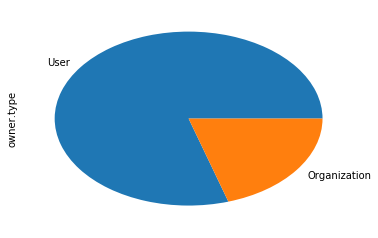

In [119]:
%matplotlib inline
search_df["owner.type"].value_counts().plot(kind="pie")